# Exploratory Data Analysis

## 1. Descriptive Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("datasets.csv")
df.head()
#df.tail(6)

,datasetName,about,link,categoryName,cloud,vintage
0,Microbiome Project,American Gut (Microbiome Project),https://github.com/biocore/American-Gut,Biology,GitHub,NaN
1,GloBI,Global Biotic Interactions (GloBI),https://github.com/jhpoelen/eol-globi-data/wik...,Biology,GitHub,NaN
2,Global Climate,Global Climate Data Since 1929,http://en.tutiempo.net/climate,Climate/Weather,NaN,1929.0
3,CommonCraw 2012,3.5B Web Pages from CommonCraw 2012,http://www.bigdatanews.com/profiles/blogs/big-...,Computer Networks,NaN,2012.0
4,Indiana Webclicks,53.5B Web clicks of 100K users in Indiana Univ.,http://cnets.indiana.edu/groups/nan/webtraffic...,Computer Networks,NaN,NaN


### Shape of the Dataset

In [7]:
df.shape

(61, 6)

### Datatypes in the Dataset

In [8]:
df.dtypes

datasetName      object
about            object
link             object
categoryName     object
cloud            object
vintage         float64
dtype: object

### Information of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datasetName   61 non-null     object 
 1   about         61 non-null     object 
 2   link          61 non-null     object 
 3   categoryName  61 non-null     object 
 4   cloud         24 non-null     object 
 5   vintage       31 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.0+ KB


### Drop a column

In [12]:
df = df.drop(['datasetName'], axis = 1)

In [13]:
df.head()

,about,link,categoryName,cloud,vintage
0,American Gut (Microbiome Project),https://github.com/biocore/American-Gut,Biology,GitHub,NaN
1,Global Biotic Interactions (GloBI),https://github.com/jhpoelen/eol-globi-data/wik...,Biology,GitHub,NaN
2,Global Climate Data Since 1929,http://en.tutiempo.net/climate,Climate/Weather,NaN,1929.0
3,3.5B Web Pages from CommonCraw 2012,http://www.bigdatanews.com/profiles/blogs/big-...,Computer Networks,NaN,2012.0
4,53.5B Web clicks of 100K users in Indiana Univ.,http://cnets.indiana.edu/groups/nan/webtraffic...,Computer Networks,NaN,NaN


## 2. Statistical Analysis

### Statistical description of the dataset

In [14]:
df.describe()

,vintage
count,31.000000
mean,2000.677419
std,24.436840
min,1920.000000
25%,2006.500000
50%,2009.000000
75%,2012.000000
max,2016.000000


### Rename columns

In [15]:
df = df.rename(columns={'about': 'description', 'vintage': 'year'})
df.head()

,description,link,categoryName,cloud,year
0,American Gut (Microbiome Project),https://github.com/biocore/American-Gut,Biology,GitHub,NaN
1,Global Biotic Interactions (GloBI),https://github.com/jhpoelen/eol-globi-data/wik...,Biology,GitHub,NaN
2,Global Climate Data Since 1929,http://en.tutiempo.net/climate,Climate/Weather,NaN,1929.0
3,3.5B Web Pages from CommonCraw 2012,http://www.bigdatanews.com/profiles/blogs/big-...,Computer Networks,NaN,2012.0
4,53.5B Web clicks of 100K users in Indiana Univ.,http://cnets.indiana.edu/groups/nan/webtraffic...,Computer Networks,NaN,NaN


### Dropping the duplicate rows   

In [17]:
duplicated_rows_df = df[df.duplicated()]
print("number of duplcate rows: ", duplicated_rows_df.shape)

number of duplcate rows:  (0, 5)


In [18]:
df = df.drop_duplicates()
df.head()

,description,link,categoryName,cloud,year
0,American Gut (Microbiome Project),https://github.com/biocore/American-Gut,Biology,GitHub,NaN
1,Global Biotic Interactions (GloBI),https://github.com/jhpoelen/eol-globi-data/wik...,Biology,GitHub,NaN
2,Global Climate Data Since 1929,http://en.tutiempo.net/climate,Climate/Weather,NaN,1929.0
3,3.5B Web Pages from CommonCraw 2012,http://www.bigdatanews.com/profiles/blogs/big-...,Computer Networks,NaN,2012.0
4,53.5B Web clicks of 100K users in Indiana Univ.,http://cnets.indiana.edu/groups/nan/webtraffic...,Computer Networks,NaN,NaN


### Dropping null values

In [19]:
print(df.isnull().sum())

description      0
link             0
categoryName     0
cloud           37
year            30
dtype: int64


In [20]:
df = df.dropna()

In [21]:
df.count()

description     2
link            2
categoryName    2
cloud           2
year            2
dtype: int64

## Detecting Outliers

<Axes: xlabel='vintage'>

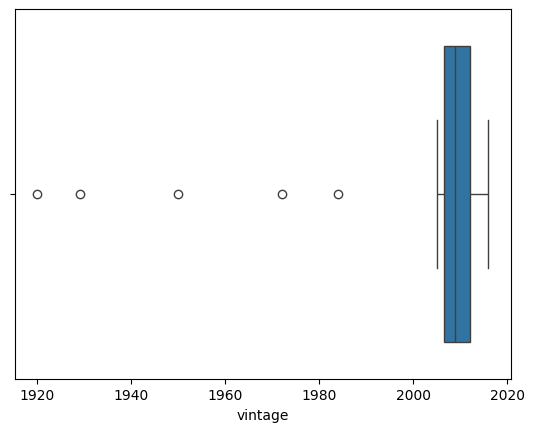

In [2]:
sns.boxplot(x=df['vintage'])

In [4]:
Q1 = df['vintage'].quantile(0.25)
Q3 = df['vintage'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

5.5


# EDA with new Dataset

In [8]:
df2 = pd.read_csv("data.csv")
df2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
df2 = df2.drop_duplicates()
df2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [12]:
df2 = df2.dropna()

In [13]:
df2.count()

Make                 7735
Model                7735
Year                 7735
Engine Fuel Type     7735
Engine HP            7735
Engine Cylinders     7735
Transmission Type    7735
Driven_Wheels        7735
Number of Doors      7735
Market Category      7735
Vehicle Size         7735
Vehicle Style        7735
highway MPG          7735
city mpg             7735
Popularity           7735
MSRP                 7735
dtype: int64

<Axes: xlabel='Engine HP'>

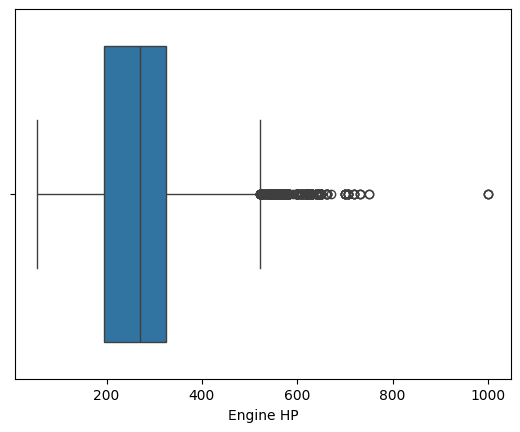

In [14]:
sns.boxplot(x=df2['Engine HP'])

In [15]:
Q1 = df2['Engine HP'].quantile(0.25)
Q3 = df2['Engine HP'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

131.0


<Axes: xlabel='MSRP'>

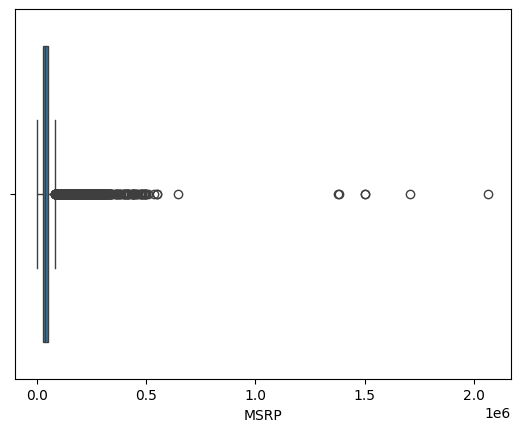

In [16]:
sns.boxplot(x=df2['MSRP'])

In [17]:
Q1 = df2['MSRP'].quantile(0.25)
Q3 = df2['MSRP'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

23252.5


<Axes: xlabel='Make'>

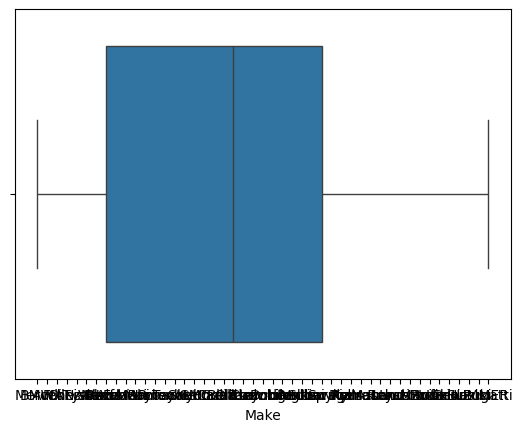

In [18]:
sns.boxplot(x=df2['Make'])

Text(0.5, 0, 'Make')

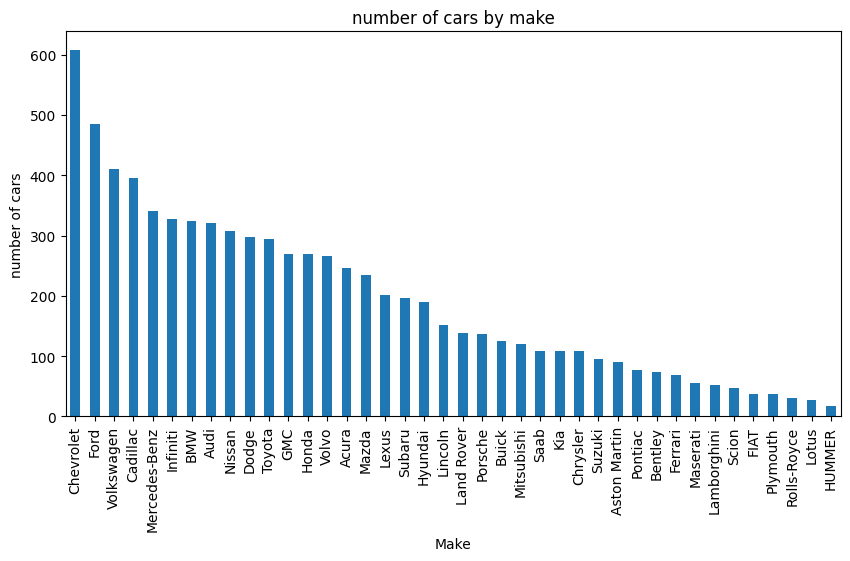

In [20]:
import matplotlib.pyplot as plt

df2.Make.value_counts().nlargest(40).plot(kind = 'bar', figsize = (10,5))
plt.title("number of cars by make")
plt.ylabel("number of cars")
plt.xlabel("Make")